# DAEN 690 Capstone Project

## Import Libraries

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing Dataset, Creating DataFrame, and Standardizing Data

### U.S. Dataset

In [2]:
#load US Dataset
df = pd.read_csv("USM00072712-data.txt", sep = '\t', header = None)

In [3]:
df

,0
0,#USM00072712 1940 06 24 99 1000 10 ...
1,31 -9999 -9999 191 -9999 -9999 -9999 338 ...
2,30 -9999 -9999 500 -9999 -9999 -9999 23 ...
3,30 -9999 -9999 750 -9999 -9999 -9999 68 ...
4,30 -9999 -9999 1000 -9999 -9999 -9999 68 ...
...,...
4797196,20 10832 694 33052B -529B 41 226 102 ...
4797197,20 10905 673 33249B -531B 41 226 93 ...
4797198,20 10925 661 33369B -532B 40 226 80 ...
4797199,20 10940 652 33462B -532B 40 227 78 ...


In [4]:
#Assigning columns
id_ = []
year = []
month = []
day = []
hour =[]
reltime = []
numlev = []
p_src = []
np_src = []
lat = []
lon = []

lvltyp1 = []
lvltyp2 = []
etime = []
press = []
pflag = []
gph = []
zflag = []
temp = []
tflag = []
rh = []
dpdp = []
wdir = []
wspd = []

for line in df[0]:
    if "USM00072712" in line:
        id_.append(line[0:12].strip())
        year.append(line[13:17].strip())
        month.append(line[18:20].strip())
        day.append(line[21:23])
        hour.append(line[24:26])
        reltime.append(line[27:31])
        numlev.append(line[33:36])
        p_src.append(line[37:45])
        np_src.append(line[46:54])
        lat.append(line[56:62])
        lon.append(line[64:71])
        lvltyp1.append(None)
        lvltyp2.append(None)
        etime.append(None)
        press.append(None)
        pflag.append(None)
        gph.append(None)
        zflag.append(None)
        temp.append(None)
        tflag.append(None)
        rh.append(None)
        dpdp.append(None)
        wdir.append(None)
        wspd.append(None)
    else:
        id_.append(None)
        year.append(None)
        month.append(None)
        day.append(None)
        hour.append(None)
        reltime.append(None)
        numlev.append(None)
        p_src.append(None)
        np_src.append(None)
        lat.append(None)
        lon.append(None)
        lvltyp1.append(line[0:1].strip())
        lvltyp2.append(line[1:2].strip())
        etime.append(line[4:8].strip())
        press.append(line[9:15].strip())
        pflag.append(line[15:16].strip())
        gph.append(line[17:21].strip())
        zflag.append(line[21:22].strip())
        temp.append(line[22:27].strip())
        tflag.append(line[27:28].strip())
        rh.append(line[28:33].strip())
        dpdp.append(line[35:39].strip())
        wdir.append(line[41:45].strip())
        wspd.append(line[47:51].strip())

In [5]:
#Creating DataFrame
us_df = pd.DataFrame({
    'id_': id_,
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'reltime': reltime,
    'numlev': numlev,
    'p_src': p_src,
    'np_src': np_src,
    'lat': lat,
    'lon': lon,
    'lvltyp1': lvltyp1,
    'lvltyp2': lvltyp2,
    'etime': etime,
    'press': press,
    'pflag': pflag,
    'gph': gph,
    'zflag': zflag,
    'temp': temp,
    'tflag': tflag,
    'rh': rh,
    'dpdp': dpdp,
    'wdir': wdir,
    'wspd': wspd})

In [6]:
#Combining Headers with variables
us_df['id_'].fillna(method = 'ffill', inplace = True)
us_df['year'].fillna(method = 'ffill', inplace = True)
us_df['month'].fillna(method = 'ffill', inplace = True)
us_df['day'].fillna(method = 'ffill', inplace = True)
us_df['hour'].fillna(method = 'ffill', inplace = True)
us_df['reltime'].fillna(method = 'ffill', inplace = True)
us_df['numlev'].fillna(method = 'ffill', inplace = True)
us_df['p_src'].fillna(method = 'ffill', inplace = True)
us_df['np_src'].fillna(method = 'ffill', inplace = True)
us_df['lat'].fillna(method = 'ffill', inplace = True)
us_df['lon'].fillna(method = 'ffill', inplace = True)

In [7]:
#Drop rows with null values
us_df = us_df.dropna()

In [8]:
#us_df data types
print(us_df.dtypes)

id_        object
year       object
month      object
day        object
hour       object
reltime    object
numlev     object
p_src      object
np_src     object
lat        object
lon        object
lvltyp1    object
lvltyp2    object
etime      object
press      object
pflag      object
gph        object
zflag      object
temp       object
tflag      object
rh         object
dpdp       object
wdir       object
wspd       object
dtype: object


In [9]:
#Convert headers to the correct data type
us_df['id_'] = us_df['id_'].astype(str)
us_df['year'] = us_df['year'].astype(int)
us_df['month'] = us_df['month'].astype(int)
us_df['day'] = us_df['day'].astype(int)
us_df['hour'] = us_df['hour'].astype(int)
us_df['reltime'] = us_df['reltime'].astype(int)
us_df['numlev'] = us_df['numlev'].astype(int)
us_df['p_src'] = us_df['p_src'].astype(str)
us_df['np_src'] = us_df['np_src'].astype(str)
us_df['lat'] = us_df['lat'].astype(int)
us_df['lon'] = us_df['lon'].astype(int)

#Convert data records to the correct data type
us_df['lvltyp1'] = us_df['lvltyp1'].astype(int)
us_df['lvltyp2'] = us_df['lvltyp2'].astype(int)
us_df['etime'] = us_df['etime'].astype(int)
us_df['press'] = us_df['press'].astype(int)
us_df['pflag'] = us_df['pflag'].astype(str)
us_df['gph'] = us_df['gph'].astype(int)
us_df['zflag'] = us_df['zflag'].astype(str)
us_df['temp'] = us_df['temp'].astype(int)
us_df['tflag'] = us_df['tflag'].astype(str)
us_df['rh'] = us_df['rh'].astype(int)
us_df['dpdp'] = us_df['dpdp'].astype(int)
us_df['wdir'] = us_df['wdir'].astype(int)
us_df['wspd'] = us_df['wspd'].astype(int)


In [10]:
us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,191,,-9999,,-9999,9999,338,40
2,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,500,,-9999,,-9999,9999,23,70
3,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,750,,-9999,,-9999,9999,68,60
4,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,1000,,-9999,,-9999,9999,68,60
5,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,-9999,,1500,,-9999,,-9999,9999,23,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797196,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,694,,3052,B,-529,B,41,226,102,67
4797197,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,673,,3249,B,-531,B,41,226,93,76
4797198,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,661,,3369,B,-532,B,40,226,80,67
4797199,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,652,,3462,B,-532,B,40,227,78,82


### Canada Dataset

In [11]:
#Loading Canadian Dataset
df2 = pd.read_csv("CAM00071701-data.txt", sep = '\t', header = None)

In [12]:
df2

,0
0,#CAM00071701 1971 06 16 11 9999 19 ncdc6309 ...
1,10 -9999 100000 137B 122A 725 48 265 ...
2,10 -9999 85000 1503B 84B 394 130 295 ...
3,10 -9999 70000 3069A -41A 300 150 335 ...
4,10 -9999 50000 5660A -203A 274 140 315 ...
...,...
476073,30 -9999 -9999 4200 -9999 -9999 -9999 265 ...
476074,30 -9999 -9999 5100 -9999 -9999 -9999 275 ...
476075,30 -9999 -9999 5700 -9999 -9999 -9999 280 ...
476076,30 -9999 -9999 6000 -9999 -9999 -9999 280 ...


In [13]:
#Assigning columns
id_2 = []
year2 = []
month2 = []
day2 = []
hour2 =[]
reltime2 = []
numlev2 = []
p_src2 = []
np_src2 = []
lat2 = []
lon2 = []

lvltyp12 = []
lvltyp22 = []
etime2 = []
press2 = []
pflag2 = []
gph2 = []
zflag2 = []
temp2 = []
tflag2 = []
rh2 = []
dpdp2 = []
wdir2 = []
wspd2 = []

for line in df2[0]:
    if "CAM00071701" in line:
        id_2.append(line[0:12].strip())
        year2.append(line[13:17].strip())
        month2.append(line[18:20].strip())
        day2.append(line[21:23])
        hour2.append(line[24:26])
        reltime2.append(line[27:31])
        numlev2.append(line[33:36])
        p_src2.append(line[37:45])
        np_src2.append(line[46:54])
        lat2.append(line[56:62])
        lon2.append(line[64:71])
        lvltyp12.append(None)
        lvltyp22.append(None)
        etime2.append(None)
        press2.append(None)
        pflag2.append(None)
        gph2.append(None)
        zflag2.append(None)
        temp2.append(None)
        tflag2.append(None)
        rh2.append(None)
        dpdp2.append(None)
        wdir2.append(None)
        wspd2.append(None)
    else:
        id_2.append(None)
        year2.append(None)
        month2.append(None)
        day2.append(None)
        hour2.append(None)
        reltime2.append(None)
        numlev2.append(None)
        p_src2.append(None)
        np_src2.append(None)
        lat2.append(None)
        lon2.append(None)
        lvltyp12.append(line[0:1].strip())
        lvltyp22.append(line[1:2].strip())
        etime2.append(line[4:8].strip())
        press2.append(line[9:15].strip())
        pflag2.append(line[15:16].strip())
        gph2.append(line[17:21].strip())
        zflag2.append(line[21:22].strip())
        temp2.append(line[22:27].strip())
        tflag2.append(line[27:28].strip())
        rh2.append(line[28:33].strip())
        dpdp2.append(line[35:39].strip())
        wdir2.append(line[41:45].strip())
        wspd2.append(line[47:51].strip())

In [14]:
#Creating DataFrame
can_df = pd.DataFrame({
    'id_': id_2,
    'year': year2,
    'month': month2,
    'day': day2,
    'hour': hour2,
    'reltime': reltime2,
    'numlev': numlev2,
    'p_src': p_src2,
    'np_src': np_src2,
    'lat': lat2,
    'lon': lon2,
    'lvltyp1': lvltyp12,
    'lvltyp2': lvltyp22,
    'etime': etime2,
    'press': press2,
    'pflag': pflag2,
    'gph': gph2,
    'zflag': zflag2,
    'temp': temp2,
    'tflag': tflag2,
    'rh': rh2,
    'dpdp': dpdp2,
    'wdir': wdir2,
    'wspd': wspd2})

In [15]:
#Combining Headers with variables
can_df['id_'].fillna(method = 'ffill', inplace = True)
can_df['year'].fillna(method = 'ffill', inplace = True)
can_df['month'].fillna(method = 'ffill', inplace = True)
can_df['day'].fillna(method = 'ffill', inplace = True)
can_df['hour'].fillna(method = 'ffill', inplace = True)
can_df['reltime'].fillna(method = 'ffill', inplace = True)
can_df['numlev'].fillna(method = 'ffill', inplace = True)
can_df['p_src'].fillna(method = 'ffill', inplace = True)
can_df['np_src'].fillna(method = 'ffill', inplace = True)
can_df['lat'].fillna(method = 'ffill', inplace = True)
can_df['lon'].fillna(method = 'ffill', inplace = True)

In [16]:
#Drop rows with null values
can_df = can_df.dropna()

In [17]:
#Convert headers to the correct data type
can_df['id_'] = can_df['id_'].astype(str)
can_df['year'] = can_df['year'].astype(int)
can_df['month'] = can_df['month'].astype(int)
can_df['day'] = can_df['day'].astype(int)
can_df['hour'] = can_df['hour'].astype(int)
can_df['reltime'] = can_df['reltime'].astype(int)
can_df['numlev'] = can_df['numlev'].astype(int)
can_df['p_src'] = can_df['p_src'].astype(str)
can_df['np_src'] = can_df['np_src'].astype(str)
can_df['lat'] = can_df['lat'].astype(int)
can_df['lon'] = can_df['lon'].astype(int)

#Convert data records to the correct data type
can_df['lvltyp1'] = can_df['lvltyp1'].astype(int)
can_df['lvltyp2'] = can_df['lvltyp2'].astype(int)
can_df['etime'] = can_df['etime'].astype(int)
can_df['press'] = can_df['press'].astype(int)
can_df['pflag'] = can_df['pflag'].astype(str)
can_df['gph'] = can_df['gph'].astype(int)
can_df['zflag'] = can_df['zflag'].astype(str)
can_df['temp'] = can_df['temp'].astype(int)
can_df['tflag'] = can_df['tflag'].astype(str)
can_df['rh'] = can_df['rh'].astype(int)
can_df['dpdp'] = can_df['dpdp'].astype(int)
can_df['wdir'] = can_df['wdir'].astype(int)
can_df['wspd'] = can_df['wspd'].astype(int)

In [18]:
can_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,100000,,137,B,122,A,725,48,265,51
2,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,85000,,1503,B,84,B,394,130,295,72
3,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,70000,,3069,A,-41,A,300,150,335,216
4,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,50000,,5660,A,-203,A,274,140,315,227
5,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,40000,,7269,B,-319,A,235,140,325,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476073,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,4200,,-9999,,-9999,9999,265,185
476074,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5100,,-9999,,-9999,9999,275,195
476075,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5700,,-9999,,-9999,9999,280,324
476076,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,6000,,-9999,,-9999,9999,280,340


## Preprocessing

## Functions

### Temperature converts to Fahrenheit

In [19]:
def temp_to_fahrenheit(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return ((celcius_input/10)*(9/5)) + 32

### Temperature converts to Kelvin

In [20]:
def temp_to_kelvin(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return (celcius_input/10) + 273.15

### Relative Humidity to Ice

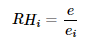
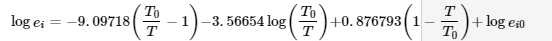

In [21]:
 def relative_humidity_to_ice(t, rh):
    if rh == -9999:
        return -9999
    elif rh == -8888:
        return -8888
    else:
        rh_std = rh / 100 # Standardizing to have rh presented in precent to hundreths
        to = 273.16 #ice-point (triple point) temperature
        e_i0 = 6.1173 #ice-point pressure

        #ei is saturated water vapor pressure over ice
        log_ei = -9.09718 * (to / t - 1) - 3.56654 * math.log(to / t) + 0.876793 * (1 - t / to) + math.log(e_i0)
        ei = math.exp(log_ei)

        #e is Actual Water Vapor Pressure. This is calculated by multiplying 
        #relative humidity by saturated vapor pressure over ice.
        e = rh_std * ei 

        #returning relative humidity to ice
        return e / ei
        

### Pressure to Pressure Altitude

In [22]:
def calculate_pressure_altitude(pressure):
    if pressure == -9999:
        return -9999    
    pressure /= 100

    pressure_altitude = (1 - (pressure / 1013.25) ** 0.190284) * 145366.45
    return round(pressure_altitude, 2)

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000  feet

In [23]:
def perform_checks(temp_f, rhi, press_alt):
    if temp_f <= -42 and rhi >= 1.00 and press_alt <= 43000:
        return 1
    else:
        return 0 

## Adding Conversions to DataFrames

### Adding Conversions to U.S. DataFrame

In [24]:
#Fahrenheit
fahrenheit = []

for line in us_df['temp']:
    fahrenheit.append(temp_to_fahrenheit(line))

us_df['temp_f'] = fahrenheit

#Kelvins
kelvin = []
for line in us_df['temp']:
    kelvin.append(temp_to_kelvin(line))

us_df['temp_k'] = kelvin

#Relative Humidity to Ice
rhi = []
for index, row in us_df.iterrows():
    temp_k = row['temp_k']
    rh = row['rh']
    rhi.append(relative_humidity_to_ice(temp_k, rh))

us_df['rhi'] = rhi

#Pressure Altitude
press_alt = []

for line in us_df['press']:
    press_alt.append(calculate_pressure_altitude(line))

us_df['press_alt'] = press_alt

#Checks 
checks = []
for index, row in us_df.iterrows():
    check = perform_checks(row['temp_f'], row['rhi'], row['press_alt'])
    checks.append(check)

us_df['checks'] = checks

In [25]:
us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,checks
1,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,,-9999,9999,338,40,-9999.00,-9999.00,-9999.00,-9999.00,0
2,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,,-9999,9999,23,70,-9999.00,-9999.00,-9999.00,-9999.00,0
3,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,,-9999,9999,68,60,-9999.00,-9999.00,-9999.00,-9999.00,0
4,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,,-9999,9999,68,60,-9999.00,-9999.00,-9999.00,-9999.00,0
5,#USM00072712,1940,6,24,99,1000,10,,cdmp-usm,468683,...,,-9999,9999,23,70,-9999.00,-9999.00,-9999.00,-9999.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797196,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,41,226,102,67,-63.22,220.25,0.41,89051.77,0
4797197,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,41,226,93,76,-63.58,220.05,0.41,89380.07,0
4797198,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,40,226,80,67,-63.76,219.95,0.40,89571.41,0
4797199,#USM00072712,2024,2,2,12,1103,325,ncdc-nws,,468683,...,B,40,227,78,82,-63.76,219.95,0.40,89716.77,0


### Adding Conversions to Canada DataFrame

In [26]:
#Fahrenheit
can_fahrenheit = []

for line in can_df['temp']:
    can_fahrenheit.append(temp_to_fahrenheit(line))

can_df['temp_f'] = can_fahrenheit

#Kelvins
can_kelvin = []
for line in can_df['temp']:
    can_kelvin.append(temp_to_kelvin(line))

can_df['temp_k'] = can_kelvin

#Relative Humidity to Ice
can_rhi = []
for index, row in can_df.iterrows():
    can_temp_k = row['temp_k']
    can_rh = row['rh']
    can_rhi.append(relative_humidity_to_ice(can_temp_k, can_rh))

can_df['rhi'] = can_rhi

#Pressure Altitude
can_press_alt = []

for line in can_df['press']:
    can_press_alt.append(calculate_pressure_altitude(line))

can_df['press_alt'] = can_press_alt

#Checks
can_checks = []
for index, row in can_df.iterrows():
    can_check = perform_checks(row['temp_f'], row['rhi'], row['press_alt'])
    can_checks.append(can_check)

can_df['checks'] = can_checks

In [27]:
can_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,checks
1,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,A,725,48,265,51,53.96,285.35,7.25,363.64,0
2,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,B,394,130,295,72,47.12,281.55,3.94,4779.19,0
3,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,A,300,150,335,216,24.62,269.05,3.00,9878.39,0
4,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,A,274,140,315,227,-4.54,252.85,2.74,18281.18,0
5,#CAM00071701,1971,6,16,11,9999,19,ncdc6309,,458330,...,A,235,140,325,160,-25.42,241.25,2.35,23564.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476073,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,9999,265,185,-9999.00,-9999.00,-9999.00,-9999.00,0
476074,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,9999,275,195,-9999.00,-9999.00,-9999.00,-9999.00,0
476075,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,9999,280,324,-9999.00,-9999.00,-9999.00,-9999.00,0
476076,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,9999,280,340,-9999.00,-9999.00,-9999.00,-9999.00,0


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [28]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
# original 
# new_us_df = us_df[(us_df['year'] == 2023) & (us_df['press_alt'] <= 4300)]
# new (since 'checks' has pressure altitude under 43000)
new_us_df = us_df[(us_df['year'] == 2023) & (us_df['checks'] == 1)]

In [29]:
#Filter and create new DataFrame. New Canada DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
#new_can_df = can_df[(can_df['year'] == 2023) & (can_df['press_alt'] <= 4300)]

new_can_df = can_df[(can_df['year'] == 2023) & (can_df['checks'] == 1)]

## Finalized Cleaned Datasets for Analysis

In [30]:
new_us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,checks
4643758,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,682,31,216,395,-54.94,224.85,6.82,30052.74,1
4643759,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,604,41,215,430,-55.48,224.55,6.04,30482.55,1
4643760,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,540,50,214,486,-53.50,225.65,5.40,31097.39,1
4643761,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,510,53,210,538,-57.64,223.35,5.10,32219.19,1
4643762,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,498,54,218,526,-61.78,221.05,4.98,33984.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778521,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,B,146,143,317,222,-61.06,221.45,1.46,32496.56,1
4778522,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,B,129,153,309,226,-60.16,221.95,1.29,33178.28,1
4778523,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,B,122,157,313,223,-59.62,222.25,1.22,33684.62,1
4778524,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,B,115,161,317,212,-59.98,222.05,1.15,33984.70,1


In [31]:
new_can_df
#(no records in 2023 pass all three checks, most can_df['rhi'] is -9999)

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,checks
